<a href="https://colab.research.google.com/github/YETI-WU/EVA_8_S2.5/blob/main/EVA_8_Assignment_Session_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)

from torch.utils.data import Dataset


## Data
The data is from the **MNIST** dataset, handwritten digit database.  
The dataset could be directly download from **torchvision library**.  
Below my code will dislay the image data and the labels.  

In [3]:
train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [5]:
len(train_set)

60000

In [6]:
train_set.train_labels

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
train_set.train_labels.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [8]:
sample = next(iter(train_set))
len(sample)

2

label : 5


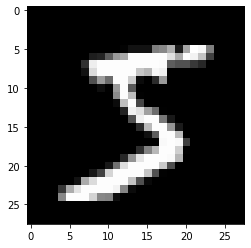

In [9]:
image, label = sample
plt.imshow(image.squeeze(), cmap='gray')
print(f'label : {label}')

In [10]:
image.shape

torch.Size([1, 28, 28])

In [11]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=32,
    shuffle=True
)

In [12]:
batch = next(iter(train_loader))

In [13]:
len(batch)

2

In [14]:
images, labels = batch
print(f'images.shape = {images.shape}')
print(f'labels.shape = {labels.shape}')

images.shape = torch.Size([32, 1, 28, 28])
labels.shape = torch.Size([32])


labels = tensor([5, 0, 1, 0, 4, 7, 5, 5, 3, 8, 9, 2, 4, 4, 4, 3, 1, 5, 8, 8, 0, 6, 5, 9, 8, 7, 5, 4, 9, 2, 4, 3])


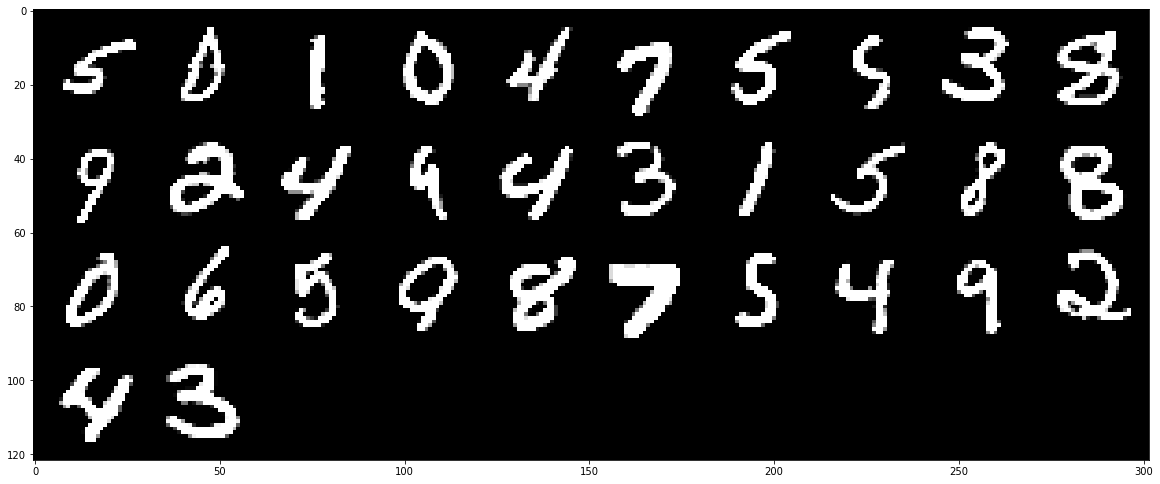

In [15]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid, (1,2,0)))
print(f'labels = {labels}')

## Data generation strategy:  
* image data is prepared in a batch number 32.  
* use torch.randint(0, 10, (1,)) to generate a random interger from 0 to 9, then convert it to OneHout tensor as the second data



In [16]:
import random
class MyDataset(Dataset):
  def __init__(self, img_dataset):
    self.img_dataset = img_dataset

  def __getitem__(self, index):
    image, img_label = self.img_dataset[index]
    #print(f'class MyDataset(Dataset): type(img_label) = {type(img_label)}')
    
    # convert image's label to OneHot torch.tensor
    label_OneHot = F.one_hot(torch.tensor(img_label), num_classes=10)
    #print(f'class MyDataset(Dataset): debug: label_OneHot.dtype =   {label_OneHot.dtype}, ')

    # generate random integer
    #rand_int = random.randint(0,9)
    #rand_int_tensor = torch.Tensor([rand_int])
    ####################################################################################################
    #rand_int = np.array([random.randint(0,9)])
    #rand_int = torch.Tensor([rand_int])
    ####################################################################################################
    rand_int_tensor = torch.randint(0, 10, (1,))
    #print(f'class MyDataset(Dataset): rand_int_tensor.dtype = {rand_int_tensor.dtype}')
    rand_int_OneHot = F.one_hot(rand_int_tensor, num_classes=10)
    #print(f'class MyDataset(Dataset): rand_int_OneHot.dtype = {rand_int_OneHot.dtype}')
    
    #print('__getitem__:')
    #print(f'rand_int = {rand_int}')
    #print(f'rand_int_OneHot = {rand_int_OneHot}')
    #print(f'rand_int_OneHot_float32 = {rand_int_OneHot_float32}, dtype = {rand_int_OneHot_float32.dtype}')
    ##print(f'__getitem__: rand_int_OneHot_float32 = {rand_int_OneHot_float32.dtype}')

    sum2 = img_label + rand_int
    #label_sum2 = torch.cat((label_OneHot, rand_int_tensor), dim=1)
    #print(label_sum2)
    
    return (image, rand_int_OneHot), (label, sum2)

  def __len__(self):
    return len(self.img_dataset)




In [17]:
# Debug only. Delete later
myData = MyDataset(train_set)
train_loader = torch.utils.data.DataLoader(myData, 
                                           batch_size = 32, 
                                           shuffle=True
                                           )
for tr in train_loader:
  print(tr)  # (image, random_integer), label
  print('*'*50)
  #(image, rand_int_OneHot_float32), (label_sum2) = tr
  #print(f'image.dtype = {image.dtype}')
  #print(f'rand_int_OneHot_float32 = {rand_int_OneHot_float32.dtype}')

  break

[[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4

In [18]:
rand_int = random.randint(0,9)
try:
  print(rand_int.dtype)
except:
  print(type(rand_int))

<class 'int'>


In [19]:
rand_int_OneHot_int64 = F.one_hot(torch.tensor(rand_int), num_classes=10)
print(rand_int_OneHot_int64, rand_int_OneHot_int64.dtype)

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) torch.int64


In [20]:
int_fromOneHot = torch.argmax(rand_int_OneHot_int64, dim=0)
print(int_fromOneHot, label, int_fromOneHot+label)

tensor(2) 5 tensor(7)


In [21]:
A = F.one_hot(torch.arange(0, 5) )
A.dtype

torch.int64

In [22]:
myData = MyDataset(train_set)
train_loader = torch.utils.data.DataLoader(myData, 
                                           batch_size = 32, 
                                           shuffle=True
                                           )

In [23]:
for tr in train_loader:
  print(tr)  # (image, random_integer), (label, sum2)
  print('*'*50)
  (image, rand_int), (label, sum2) = tr
  print(f'image.dtype = {image.dtype}')
  print(f'rand_int = {type(rand_int)}')

  break

[[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4

In [24]:
batch = next(iter(train_loader))
len(batch)

2

## Build the Network
The network takes two input:  
1.   Image, handwritten digit from MNIST  
2.   Tensor of random interger 
  
To combined the two inputs in the network:  
Firs, image is run through layers with Conv2d, relu, and maxpool2d, to predict the label of handwritten digit.
Second, the previous ouput was unsqueeze in (dim=1), then concatenate with the random number as one-hot tensor.  
  
The final output contain the image label prediction and softmax output of the two number sum.  



In [25]:

class Network(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = torch.nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = torch.nn.Linear(in_features=120, out_features=60)
    self.out = torch.nn.Linear(in_features=60, out_features=10)

    self.fcX2 = torch.nn.Linear(in_features=20, out_features=20)
    self.out2 = torch.nn.Linear(in_features=20, out_features=19)
  
  def forward(self, t1, t2):
    # input layer
    x = t1
    #print(f'x.shape = {x.shape}')
    x2 = torch.as_tensor(t2)
    #print(f'x2.shape = {x2.shape}')
    #x2 = F.one_hot(x2, num_classes=10) # input is already One-Hot
    

    # conv1 layer
    x = self.conv1(x)  # 28 --> 24
    x = F.relu(x)  # activation function
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12

    # conv2 layer
    x = self.conv2(x)  # 12 --> 8
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4

    # reshape
    x = x.reshape(-1, 12 * 4 * 4)

    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)

    # output layer
    x = self.out(x)
    x_out = F.softmax(x, dim=1)
    #print(f'x_out.shape = {x_out.shape}')
    x_out_unsqueeze = x_out.unsqueeze(dim=1)
    #print(f'x_out_unsqueeze.shape = {x_out_unsqueeze.shape}')

    # fcX2 layer
    #print('here1')
    x2 = torch.cat((x_out_unsqueeze, x2), dim=2)
    #print(f'after cat: x2.shape = {x2.shape}')
    x2 = self.fcX2(x2)
    #print('here2')
    
    #x2 = F.relu(x2)

    x2 = self.out2(x2)
    x2_out = F.softmax(x2, dim=1)
    #print(f'x2_out.shape = {x2_out.shape}')
    #x2_int = x2_out.argmax()
    #print(f'x2_int = {x2_int}')
    #print('here3')
    return x_out, x2_out

In [27]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

## Network is evaluate by two parts
*   Total correct number (divided by 60,000 to show correctness in %)  
*   Loss function: cross_entropy



In [28]:
network = Network()
train_loader = torch.utils.data.DataLoader(myData, 
                                           batch_size = 32, 
                                           shuffle=True
                                           )
optimizer = torch.optim.Adam(network.parameters(), 
                             lr=0.01
                             )
for epoch in range(10):
    total_loss = 0
    total_correct = 0
    for batch in train_loader: # Get Batch
        (images, rand_ints), (labels, sum2s) = batch 

        pred_labe, pred_sum2 = network(images, rand_ints) # Pass Batch
        #print('*'*100)
        #print(f'pred_labe.shape = {pred_labe.shape}')
        #print(f'pred_sum2 = {pred_sum2.shape}, \n{pred_sum2}')
        #print(f'sum2s = {sum2s.shape}, \n{sum2s}')
        loss = F.cross_entropy(pred_sum2.squeeze(dim=1), sum2s) # Calculate Loss


        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights
        
        total_loss += loss.item()
        total_correct += get_num_correct(pred_sum2.squeeze(dim=1), sum2s)

    print(
        "epoch ", epoch, 
        ", total_correct: ", total_correct, 
        ", loss: ", total_loss
    )

epoch  0 , total_correct:  582 , loss:  5520.823001861572
epoch  1 , total_correct:  584 , loss:  5520.823001861572
epoch  2 , total_correct:  584 , loss:  5520.823001861572
epoch  3 , total_correct:  602 , loss:  5520.823001861572
epoch  4 , total_correct:  642 , loss:  5520.823001861572
epoch  5 , total_correct:  608 , loss:  5520.823001861572
epoch  6 , total_correct:  626 , loss:  5520.823001861572
epoch  7 , total_correct:  547 , loss:  5520.823001861572
epoch  8 , total_correct:  566 , loss:  5520.823001861572
epoch  9 , total_correct:  588 , loss:  5520.823001861572
